<a href="https://colab.research.google.com/github/showpiecep/ML_labs/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.drop(columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])
df 

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116
...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143
295,55.0,1820,38,270000.00,1.2,139
296,45.0,2060,60,742000.00,0.8,138
297,45.0,2413,38,140000.00,1.4,140


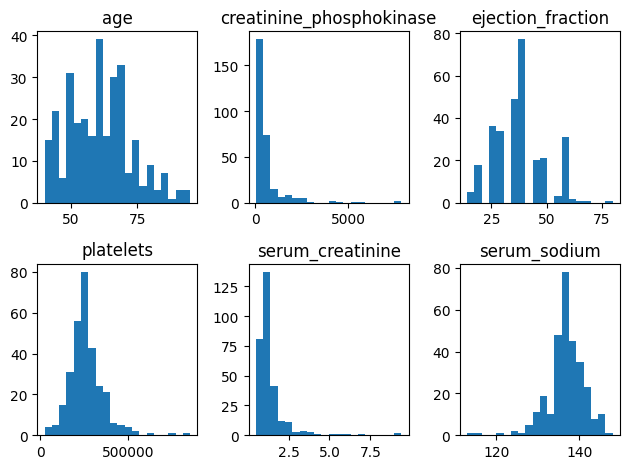

In [2]:
import matplotlib.pyplot as plt
n_bins = 20
fig, axs = plt.subplots(2,3)

# Признак "age"
axs[0, 0].hist(df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')
age_range = (df['age'].min(), df['age'].max())
age_mode = df['age'].mode().values[0]

# Признак "creatinine_phosphokinase"
axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
cpk_range = (df['creatinine_phosphokinase'].min(), df['creatinine_phosphokinase'].max())
cpk_mode = df['creatinine_phosphokinase'].mode().values[0]

# Признак "ejection_fraction"
axs[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
ef_range = (df['ejection_fraction'].min(), df['ejection_fraction'].max())
ef_mode = df['ejection_fraction'].mode().values[0]

# Признак "platelets"
axs[1, 0].hist(df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')
platelets_range = (df['platelets'].min(), df['platelets'].max())
platelets_mode = df['platelets'].mode().values[0]

# Признак "serum_creatinine"
axs[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
sc_range = (df['serum_creatinine'].min(), df['serum_creatinine'].max())
sc_mode = df['serum_creatinine'].mode().values[0]

# Признак "serum_sodium"
axs[1, 2].hist(df['serum_sodium'].values, bins = n_bins)
axs[1, 2].set_title('serum_sodium')
ss_range = (df['serum_sodium'].min(), df['serum_sodium'].max())
ss_mode = df['serum_sodium'].mode().values[0]

plt.tight_layout()
plt.show()

In [18]:
# Вывод диапазонов значений и значений с наибольшим количеством наблюдений
print("Признак 'age': диапазон", age_range, "наибольшее количество наблюдений вокруг:", age_mode)
print("Признак 'creatinine_phosphokinase': диапазон", cpk_range, "наибольшее количество наблюдений вокруг:", cpk_mode)
print("Признак 'ejection_fraction': диапазон", ef_range, "наибольшее количество наблюдений вокруг:", ef_mode)
print("Признак 'platelets': диапазон", platelets_range, "наибольшее количество наблюдений вокруг:", platelets_mode)
print("Признак 'serum_creatinine': диапазон", sc_range, "наибольшее количество наблюдений вокруг:", sc_mode)
print("Признак 'serum_sodium': диапазон", ss_range, "наибольшее количество наблюдений вокруг:", ss_mode)


Признак 'age': диапазон (-1.84313753207547, 2.574609312672534) наибольшее количество наблюдений вокруг: 60.0
Признак 'creatinine_phosphokinase': диапазон (23, 7861) наибольшее количество наблюдений вокруг: 582
Признак 'ejection_fraction': диапазон (14, 80) наибольшее количество наблюдений вокруг: 35
Признак 'platelets': диапазон (25100.0, 850000.0) наибольшее количество наблюдений вокруг: 263358.03
Признак 'serum_creatinine': диапазон (0.5, 9.4) наибольшее количество наблюдений вокруг: 1.0
Признак 'serum_sodium': диапазон (113, 148) наибольшее количество наблюдений вокруг: 136


In [4]:
data = df.to_numpy(dtype='float')

In [5]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data[:150,:])

In [6]:
data_scaled = scaler.transform(data)

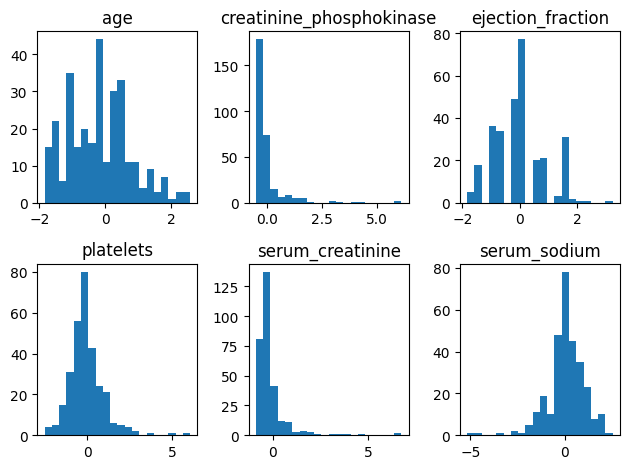

In [7]:
fig, axs = plt.subplots(2,3)

axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
age_range = (data_scaled[:,0].min(), data_scaled[:,0].max())
age_mode = df['age'].mode().values[0]

axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

plt.tight_layout()
plt.show()

In [31]:
from collections import Counter

# Вывод диапазонов значений и значений с наибольшим количеством наблюдений
print(f"Age:              ({min(data_scaled[:, 0]):.2f} , {max(data_scaled[:, 0]):.2f}) наибольшее количество наблюдений вокруг: {Counter(data_scaled[:, 0]).most_common(1)[0][0]:.2f}")
print(f"Creatinine Phosphokinase: ({min(data_scaled[:, 1]):.2f} , {max(data_scaled[:, 1]):.2f}) наибольшее количество наблюдений вокруг: {Counter(data_scaled[:, 1]).most_common(1)[0][0]:.2f}")
print(f"Ejection Fraction: ({min(data_scaled[:, 2]):.2f} , {max(data_scaled[:, 2]):.2f}) наибольшее количество наблюдений вокруг: {Counter(data_scaled[:, 2]).most_common(1)[0][0]:.2f}")
print(f"Platelets:        ({min(data_scaled[:, 3]):.2f} , {max(data_scaled[:, 3]):.2f}) наибольшее количество наблюдений вокруг: {Counter(data_scaled[:, 3]).most_common(1)[0][0]:.2f}")
print(f"Serum Creatinine: ({min(data_scaled[:, 4]):.2f} , {max(data_scaled[:, 4]):.2f}) наибольшее количество наблюдений вокруг: {Counter(data_scaled[:, 4]).most_common(1)[0][0]:.2f}")
print(f"Serum Sodium:     ({min(data_scaled[:, 5]):.2f} , {max(data_scaled[:, 5]):.2f}) наибольшее количество наблюдений вокруг: {Counter(data_scaled[:, 5]).most_common(1)[0][0]:.2f}")


Age:              (-1.84 , 2.57) наибольшее количество наблюдений вокруг: -0.24
Creatinine Phosphokinase: (-0.49 , 6.10) наибольшее количество наблюдений вокруг: -0.02
Ejection Fraction: (-1.84 , 3.23) наибольшее количество наблюдений вокруг: -0.23
Platelets:        (-2.51 , 6.06) наибольшее количество наблюдений вокруг: -0.04
Serum Creatinine: (-0.87 , 6.76) наибольшее количество наблюдений вокруг: -0.45
Serum Sodium:     (-5.17 , 2.54) наибольшее количество наблюдений вокруг: -0.10


Данные до стандартизации:

Диапазон значений для каждого признака может быть различным.
Средние значения признаков могут отличаться от нуля.
Форма распределения признаков может быть различной.

Данные после стандартизации:

Диапазон значений для каждого признака становится примерно одинаковым.
Средние значения признаков становятся близкими к нулю.
Распределение признаков имеет схожую форму, но масштабировано так, что стандартное отклонение равно единице.

Стандартизация данных выполняется для того, чтобы привести признаки к одной шкале и обеспечить их сопоставимость. Это полезно для многих алгоритмов машинного обучения, которые чувствительны к масштабу данных. После стандартизации у нас есть данные, в которых значения признаков сгруппированы около нуля и имеют близкую единичное стандартное отклонение, что упрощает интерпретацию и сравнение значений признаков.

In [19]:
# Расчёт мат. ожидания и СКО до стандартизации
mean_before = np.mean(df, axis=0)
std_before = np.std(df, axis=0)

# Расчёт мат. ожидания и СКО после стандартизации
mean_after = np.mean(data_scaled, axis=0)
std_after = np.std(data_scaled, axis=0)

# Вывод результатов
for i, column in enumerate(df.columns):
    print(f"Признак: {column}")
    print(f"Формула стандартизации: z = (x - {mean_before[i]}) / {std_before[i]}")
    print(f"Мат. ожидание до стандартизации: {mean_before[i]}")
    print(f"СКО до стандартизации: {std_before[i]}")
    print(f"Мат. ожидание после стандартизации: {mean_after[i]}")
    print(f"СКО после стандартизации: {std_after[i]}")

Признак: age
Формула стандартизации: z = (x - 60.83389297658862) / 11.874901429842655
Мат. ожидание до стандартизации: 60.83389297658862
СКО до стандартизации: 11.874901429842655
Мат. ожидание после стандартизации: -0.16970362369106984
СКО после стандартизации: 0.9538237876978354
Признак: creatinine_phosphokinase
Формула стандартизации: z = (x - 581.8394648829432) / 968.6639668032415
Мат. ожидание до стандартизации: 581.8394648829432
СКО до стандартизации: 968.6639668032415
Мат. ожидание после стандартизации: -0.021276750290383013
СКО после стандартизации: 0.8141790488228113
Признак: ejection_fraction
Формула стандартизации: z = (x - 38.08361204013378) / 11.815033462318585
Мат. ожидание до стандартизации: 38.08361204013378
СКО до стандартизации: 11.815033462318585
Мат. ожидание после стандартизации: 0.01050249484809085
СКО после стандартизации: 0.9061082161919123
Признак: platelets
Формула стандартизации: z = (x - 263358.02926421404) / 97640.54765451424
Мат. ожидание до стандартизации:

Стандартизированное значение вычисляется по формуле:

[x(i) - M(i)] / σ

In [23]:
# Вывод результатов
for i, column in enumerate(df.columns):
    print(f"Признак: {column}")
    print(f"Формула стандартизации: z = (x - {mean_before[i]}) / {std_before[i]}")
    print(f"mean_ объекта scaler: {scaler.mean_[i]}")
    print(f"var_ объекта scaler: {scaler.var_[i]}")

Признак: age
Формула стандартизации: z = (x - 60.83389297658862) / 11.874901429842655
mean_ объекта scaler: 62.946666666666665
var_ объекта scaler: 154.99715555555557

Признак: creatinine_phosphokinase
Формула стандартизации: z = (x - 581.8394648829432) / 968.6639668032415
mean_ объекта scaler: 607.1533333333333
var_ объекта scaler: 1415488.8231555554

Признак: ejection_fraction
Формула стандартизации: z = (x - 38.08361204013378) / 11.815033462318585
mean_ объекта scaler: 37.946666666666665
var_ объекта scaler: 170.02382222222224

Признак: platelets
Формула стандартизации: z = (x - 263358.02926421404) / 97640.54765451424
mean_ объекта scaler: 266746.74946666666
var_ объекта scaler: 9252860499.078917

Признак: serum_creatinine
Формула стандартизации: z = (x - 1.3938795986622072) / 1.0327786652795918
mean_ объекта scaler: 1.5206000000000002
var_ объекта scaler: 1.3605269733333336

Признак: serum_sodium
Формула стандартизации: z = (x - 136.62541806020067) / 4.405092379513557
mean_ объекта

In [25]:
scaler_of_data = preprocessing.StandardScaler().fit(data)

In [26]:
print(f'mean_:\n{scaler_of_data.mean_}')
print(f'var_:\n{scaler_of_data.var_}')

mean_:
[6.08338930e+01 5.81839465e+02 3.80836120e+01 2.63358029e+05
 1.39387960e+00 1.36625418e+02]
var_:
[1.41013284e+02 9.38309881e+05 1.39595016e+02 9.53367655e+09
 1.06663177e+00 1.94048389e+01]


In [28]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)

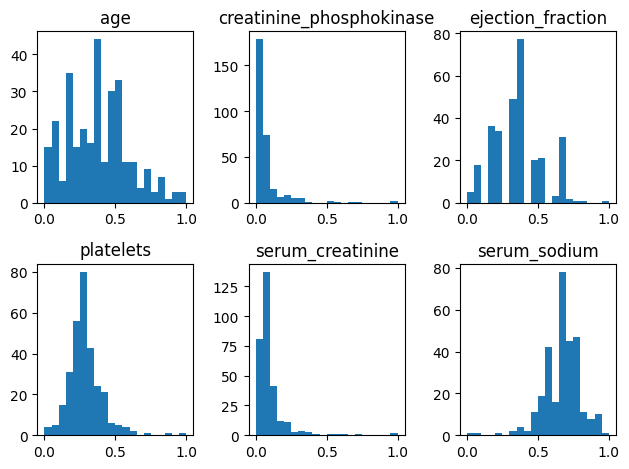

In [29]:
fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(data_min_max_scaled[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_min_max_scaled[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_min_max_scaled[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_min_max_scaled[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_min_max_scaled[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_min_max_scaled[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.tight_layout()
plt.show()

In [32]:
age_min = data_min_max_scaled[:, 0].min()
age_max = data_min_max_scaled[:, 0].max()
print(f"Age: ({age_min}, {age_max})")

cpk_min = data_min_max_scaled[:, 1].min()
cpk_max = data_min_max_scaled[:, 1].max()
print(f"Creatinine_phosphokinase: ({cpk_min}, {cpk_max})")

ef_min = data_min_max_scaled[:, 2].min()
ef_max = data_min_max_scaled[:, 2].max()
print(f"Ejection_fraction: ({ef_min}, {ef_max})")

platelets_min = data_min_max_scaled[:, 3].min()
platelets_max = data_min_max_scaled[:, 3].max()
print(f"Platelets: ({platelets_min}, {platelets_max})")

sc_min = data_min_max_scaled[:, 4].min()
sc_max = data_min_max_scaled[:, 4].max()
print(f"Serum_creatinine: ({sc_min}, {sc_max})")

sodium_min = data_min_max_scaled[:, 5].min()
sodium_max = data_min_max_scaled[:, 5].max()
print(f"Serum_sodium: ({sodium_min}, {sodium_max})")

Age: (0.0, 1.0)
Creatinine_phosphokinase: (0.0, 1.0)
Ejection_fraction: (0.0, 1.0)
Platelets: (0.0, 0.9999999999999999)
Serum_creatinine: (0.0, 0.9999999999999999)
Serum_sodium: (0.0, 1.0)


In [34]:
print(f"Age: ({data_min_max_scaled[:,0].min()}, {data_min_max_scaled[:,0].max()})")
print(f"Creatinine_phosphokinase: ({data_min_max_scaled[:,1].min()}, {data_min_max_scaled[:,1].max()})")
print(f"Ejection_fraction: ({data_min_max_scaled[:,2].min()}, {data_min_max_scaled[:,2].max()})")
print(f"Platelets: ({data_min_max_scaled[:,3].min()}, {data_min_max_scaled[:,3].max()})")
print(f"Serum_creatinine: ({data_min_max_scaled[:,4].min()}, {data_min_max_scaled[:,4].max()})")
print(f"Serum_sodium: ({data_min_max_scaled[:,5].min()}, {data_min_max_scaled[:,5].max()})")

Age: (0.0, 1.0)
Creatinine_phosphokinase: (0.0, 1.0)
Ejection_fraction: (0.0, 1.0)
Platelets: (0.0, 0.9999999999999999)
Serum_creatinine: (0.0, 0.9999999999999999)
Serum_sodium: (0.0, 1.0)


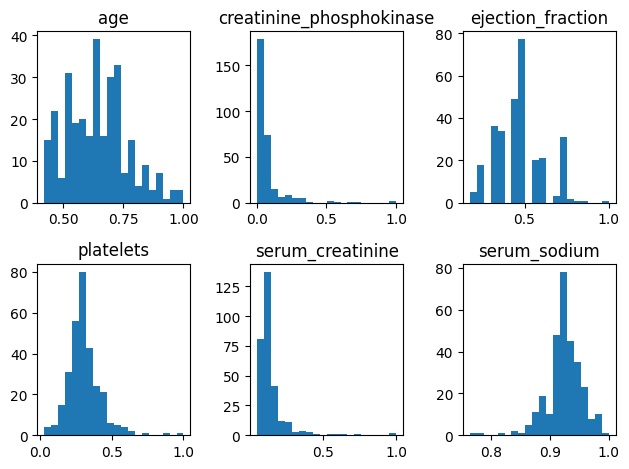

In [35]:
max_abs_scaler = preprocessing.MaxAbsScaler().fit(data)
data_max_abs_scaled = max_abs_scaler.transform(data)

fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(data_max_abs_scaled[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_max_abs_scaled[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_max_abs_scaled[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_max_abs_scaled[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_max_abs_scaled[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_max_abs_scaled[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.tight_layout()
plt.show()

In [36]:
print(f"Age: ({data_max_abs_scaled[:,0].min()}, {data_max_abs_scaled[:,0].max()})")
print(f"Creatinine_phosphokinase: ({data_max_abs_scaled[:,1].min()}, {data_max_abs_scaled[:,1].max()})")
print(f"Ejection_fraction: ({data_max_abs_scaled[:,2].min()}, {data_max_abs_scaled[:,2].max()})")
print(f"Platelets: ({data_max_abs_scaled[:,3].min()}, {data_max_abs_scaled[:,3].max()})")
print(f"Serum_creatinine: ({data_max_abs_scaled[:,4].min()}, {data_max_abs_scaled[:,4].max()})")
print(f"Serum_sodium: ({data_max_abs_scaled[:,5].min()}, {data_max_abs_scaled[:,5].max()})")

Age: (0.42105263157894735, 1.0)
Creatinine_phosphokinase: (0.0029258364075817325, 1.0)
Ejection_fraction: (0.175, 1.0)
Platelets: (0.029529411764705884, 1.0)
Serum_creatinine: (0.05319148936170213, 1.0)
Serum_sodium: (0.7635135135135135, 1.0)


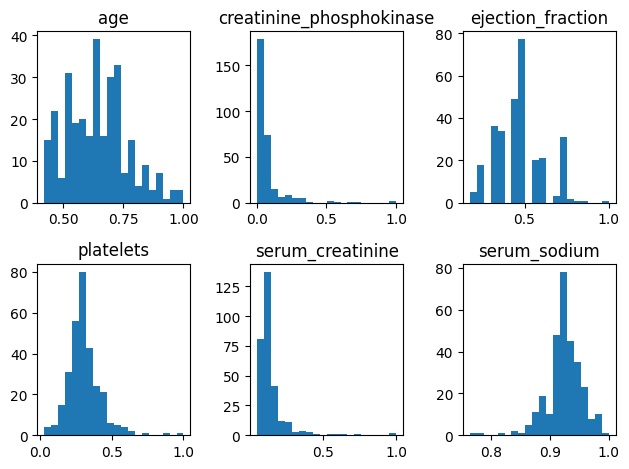

In [38]:
robust_scaler = preprocessing.RobustScaler().fit(data)
robust_scaled = max_abs_scaler.transform(data)

fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(robust_scaled[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(robust_scaled[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(robust_scaled[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(robust_scaled[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(robust_scaled[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(robust_scaled[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.tight_layout()
plt.show()

In [39]:
print(f"Age: ({robust_scaled[:,0].min()}, {robust_scaled[:,0].max()})")
print(f"Creatinine_phosphokinase: ({robust_scaled[:,1].min()}, {robust_scaled[:,1].max()})")
print(f"Ejection_fraction: ({robust_scaled[:,2].min()}, {robust_scaled[:,2].max()})")
print(f"Platelets: ({robust_scaled[:,3].min()}, {robust_scaled[:,3].max()})")
print(f"Serum_creatinine: ({robust_scaled[:,4].min()}, {robust_scaled[:,4].max()})")
print(f"Serum_sodium: ({robust_scaled[:,5].min()}, {robust_scaled[:,5].max()})")

Age: (0.42105263157894735, 1.0)
Creatinine_phosphokinase: (0.0029258364075817325, 1.0)
Ejection_fraction: (0.175, 1.0)
Platelets: (0.029529411764705884, 1.0)
Serum_creatinine: (0.05319148936170213, 1.0)
Serum_sodium: (0.7635135135135135, 1.0)


In [40]:
def from_old_range_to_new(old_value,old_min=0.0,old_max=1.0,new_min=-5,new_max=10):
    old_range = old_max - old_min  
    new_range = new_max - new_min  
    converted_value = ((old_value - old_min) * new_range / old_range) + new_min
    return converted_value

In [41]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles = 100, random_state=0).fit(data)
data_quantile_scaled = quantile_transformer.transform(data)

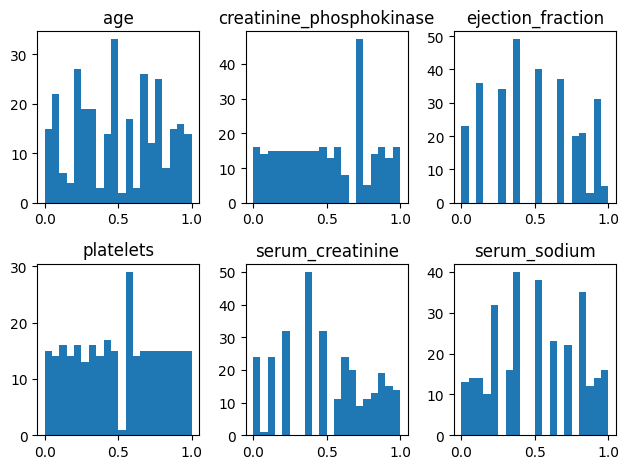

In [42]:
fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(data_quantile_scaled[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_quantile_scaled[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_quantile_scaled[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_quantile_scaled[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_quantile_scaled[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_quantile_scaled[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.tight_layout()
plt.show()

Количество вычисляемых квантилей при использовании дискретизации данных определяется параметром `n_quantiles`.

In [43]:
quantile_transformer_normal = preprocessing.QuantileTransformer(n_quantiles=100, output_distribution='normal').fit(data)
data_quantile_scaled_normal = quantile_transformer_normal.transform(data)

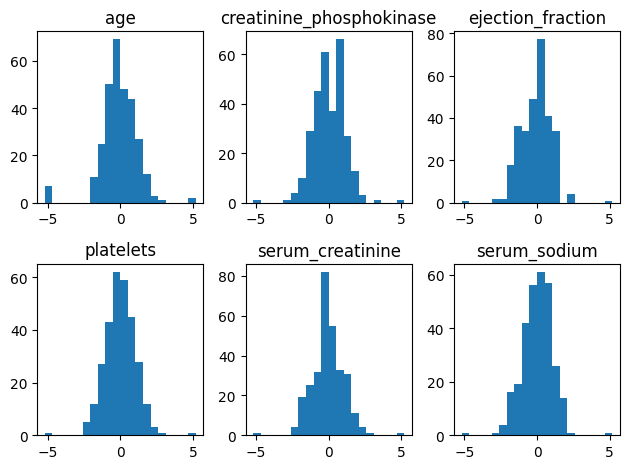

In [44]:
fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(data_quantile_scaled_normal[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_quantile_scaled_normal[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_quantile_scaled_normal[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_quantile_scaled_normal[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_quantile_scaled_normal[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_quantile_scaled_normal[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.tight_layout()
plt.show()

In [45]:
transformer_power_scale = preprocessing.PowerTransformer().fit(data)
scaled_power_scaled = transformer_power_scale.transform(data)

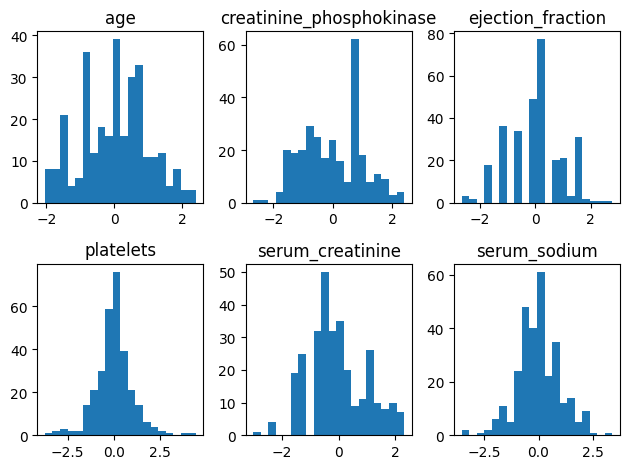

In [46]:
fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(scaled_power_scaled[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(scaled_power_scaled[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(scaled_power_scaled[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(scaled_power_scaled[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(scaled_power_scaled[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(scaled_power_scaled[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.tight_layout()
plt.show()

In [47]:
discretizer_scale = preprocessing.KBinsDiscretizer(n_bins=[3, 4, 3, 10, 2, 4], encode='ordinal', strategy='quantile')
discretizer_scaled = discretizer_scale.fit_transform(data)

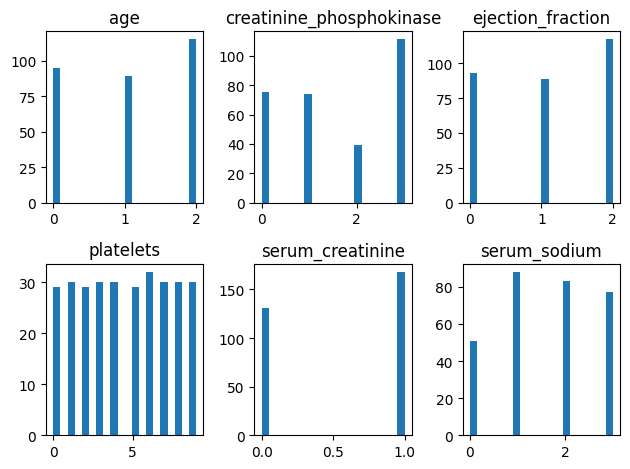

In [48]:
fig, axs = plt.subplots(2, 3)
fig.tight_layout()

axs[0, 0].hist(discretizer_scaled[:, 0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(discretizer_scaled[:, 1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(discretizer_scaled[:, 2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(discretizer_scaled[:, 3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(discretizer_scaled[:, 4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(discretizer_scaled[:, 5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.tight_layout()
plt.show()

Гистограммы сосредоточены на представлении данных в виде дискретных интервалов (ячеек) и подсчете количества значений, попадающих в каждую ячейку. Они помогают визуализировать и анализировать распределение данных.

In [49]:
discretizer_scale.bin_edges_

array([array([40., 55., 65., 95.]),
       array([  23. ,  116.5,  250. ,  582. , 7861. ]),
       array([14., 35., 40., 80.]),
       array([ 25100., 153000., 196000., 221000., 237000., 262000., 265000.,
              285200., 319800., 374600., 850000.])                          ,
       array([0.5, 1.1, 9.4]), array([113., 134., 137., 140., 148.])],
      dtype=object)